![pymaceuticals](https://img.freepik.com/free-vector/genetic-laboratory-research-experiment-tiny-scientists-people-testing-dna-modifications-holding-puzzle-hands-flat-vector-illustration-biotechnology-genetically-modified-animals-concept_74855-21121.jpg?w=740&t=st=1673926734~exp=1673927334~hmac=1cb46c0a3352f424f9f0ba1eeed571410e4aebe370426ebfac53b6d613165cbc)

# Pymaceuticals Inc.
---


## Background

As a senior data analyst at the company, I've been given access to the complete data from their most recent animal study. 

The executive team has tasked me with generating all of the tables and figures needed for the technical report of the clinical study. They have also asked me for a top-level summary of the study results.

## Executive Summary

### 1 Highlight on Pymaceuticas Analysis:

In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

### 2 Observations & Insights

#### Summary Statistics


![summary stats](data/summary_statistics.png)

1. **Total number of timepoints for all mice tested for each drug regimen :** There are 10 treatments in this study, the highest number of study is treated by Capomulin and the lowest number of study is treated by Propriva. This means the study focused toward Capomulin to other treatments.
![bar_plot](data/bar_plot.png)



2. **Distribution of female versus male mice :** The male mice are 1% higher than female mice, the distribution is not significant variable to the study.


![dist of sex](data/dist_sex.png)

3. **Distrubution of the tumor volume for each treatment group :** The 4 regimens of interest are (Capomulin, Ramicane, Infubinol, and Ceftamin), the final tumor volume treated by Capomulin and Ramicane tend to have lower number than the others. Ramicane seems to have the least final tumor volume, however, the number of mice treated by Ramicane is slightly less than Capomulin. To have more accurate study and conclusion, the treatment of both regimens might be continued with the same number of mice.


![final_tumor_volume](data/final_tumor_volume.png)


4. **Mouse ID l509 :** is an exemple of mouse treated by Capomulin, the tumor volume seems to decrease when the time has passed.

![Mouse ID](data/mouse_id.png)


5. **Capomulin's correlation between average weight and final tumor :** The correlation between mouse weight and the average tumor volume is 0.84, that means there is a relation between this 2 variables, also, the r² is 0.71 infer that the final tumor volume could be predictable by using avrage weight of mouse.   

![correlation](data/scatter_W_vs_T.png)




In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,  how="right")
# Display the data table for preview
combined_data= combined_data[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [84]:
# Checking the number of mice.
mice= combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [85]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [86]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df= combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [88]:
# Checking the number of mice in the clean DataFrame.
clean_mice= clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_mean= clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_median= clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_variance= clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_std= clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_sem= clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_statistics_table = pd.DataFrame({"Mean Tumor Volume": regimen_mean, 
                                         "Median Tumor Volume": regimen_median, 
                                         "Tumor Volume Variance": regimen_variance, 
                                         "Tumor Volume Std. Dev.": regimen_std,
                                        "Tumor Volume Std. Err.": regimen_sem,})
summary_statistics_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregation= clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median","var","std","sem"])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

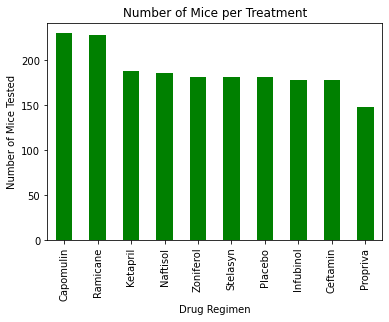

In [91]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Calculate the number of mice tested by drug regimen
timepoint= clean_df["Drug Regimen"].value_counts()

# Generate the bar plot, title, and x/y labels
bar_plot= timepoint.plot.bar(title='Number of Mice per Treatment', xlabel= "Drug Regimen", ylabel= "Number of Mice Tested", color="green")

# Display the bar chart
plt.show()

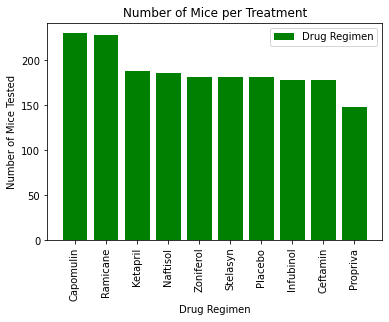

In [92]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set x/y axis
x_axis= timepoint.index.values
y_axis= timepoint.values

# Generate the bar plot, title, and x/y labels
plt.bar(x_axis, y_axis, color="green")
plt.title('Number of Mice per Treatment')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
legend= ["Drug Regimen"]
plt.legend(legend, loc="best")

# Save the chart
plt.savefig("data/bar_plot.png")

# Display the bar chart 
plt.show()

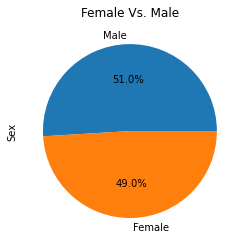

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the number of mice fo each sex
gender= clean_df["Sex"].value_counts()

# Generate a pie chart & title
gender.plot.pie(x="gender", title= "Female Vs. Male", autopct="%1.1f%%")

# Display the pie chart
plt.show()

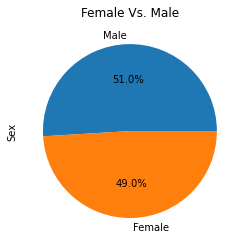

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a pie chart, title and ylabel
plt.pie(gender, labels=gender.index.values, autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.title("Female Vs. Male")

# Save the chart
plt.savefig("data/dist_sex.png")

# Display the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tmp= combined_data.groupby(["Mouse ID"])["Timepoint"].max()
last_tmp_df= pd.DataFrame(last_tmp)
last_tmp_df= last_tmp_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_df= pd.merge(last_tmp_df, combined_data, on= ["Mouse ID", "Timepoint"])
tumor_vol_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatment= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol= tumor_vol_df.loc[tumor_vol_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

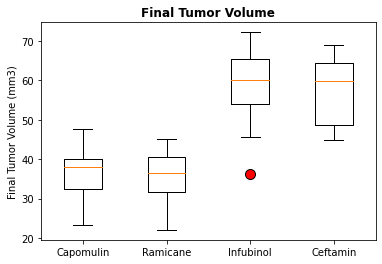

In [97]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(tumor_volume_list, labels=treatment, flierprops={"markerfacecolor":"r", "markersize":10})

#Set x/y label and title
final_tumor_plot.set_title("Final Tumor Volume", fontweight="bold")
final_tumor_plot.set_ylabel("Final Tumor Volume (mm3)")

# Save the chart
plt.savefig("data/final_tumor_volume.png")

# Display the chart
plt.show()

## Line and Scatter Plots

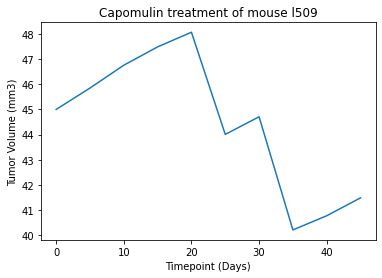

In [98]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]

# Identify the specific mouse id and get the data of the mouse id :l509
mouse_id = "l509"
mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"]==mouse_id]

# Generate a line plot
tmp_vol = plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])

# Set title & x/y label
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the chart
plt.savefig("data/mouse_id.png")

# Display the chart
plt.show()

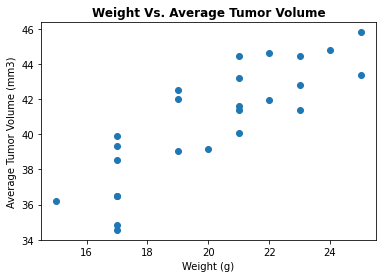

In [99]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Calculate the mean of Weight (g) & Tumor Volume (mm3) based on Mouse ID
capomulin = capomulin_df.groupby("Mouse ID").mean()
mice_weight_avg=capomulin["Weight (g)"]
mice_tumor_avg = capomulin["Tumor Volume (mm3)"]

# Generate the scatter plot
plt.scatter(mice_weight_avg, mice_tumor_avg)

# Set title & x/y label
plt.title("Weight Vs. Average Tumor Volume", fontweight = "bold")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the chart
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r² is : 0.71


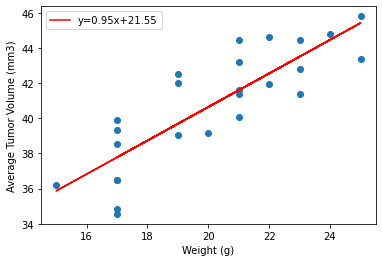

In [100]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Define x, y values
x_values = mice_weight_avg
y_values = mice_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation between mouse weight and the average tumor volume is {correlation}' )

# Calculate the linear regression values
(slope, intercept, r, p, stderr) = st.linregress(x_values, y_values)

# Calculate r²
r_sq = round(r**2,2)
print(f'The r² is : {r_sq}' )

# y= ax+b
regress_values = x_values*slope+intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept))

# plot the scatter chart with linear regression line, equation of line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label= "y={:.2f}x+{:.2f}".format(slope,intercept))

# Set x/y label & legend
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

# Save the chart
plt.savefig("data/scatter_W_vs_T.png")

# Display the chart
plt.show()
                      